### **Selected Machine Learning Model**

In [9]:
# Load the datasets
import pandas as pd
import numpy as np
train_data = pd.read_csv('cleaned_train_dataset.csv')
test_data = pd.read_csv('cleaned_test_dataset.csv')

# Display the column names
print("Train Data Columns:", train_data.columns.tolist())
print("Test Data Columns:", test_data.columns.tolist())


Train Data Columns: ['PL', 'PR', 'Sepsis']
Test Data Columns: ['Column1']


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('cleaned_train_dataset.csv')
test_data = pd.read_csv('cleaned_test_dataset.csv')

# Print column names to verify
print("Train data columns:", train_data.columns)
print("Test data columns:", test_data.columns)

# Identify the target column (assuming it's the last column in train_data)
target_column = 'Sepsis'

# Separate features and target variable
X_train = train_data.drop([target_column], axis=1)
y_train = train_data[target_column]

# For test data, only separate features (assuming target is not present)
X_test = test_data

# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender']  # Add other categorical columns if present
for col in categorical_cols:
    if col in X_train.columns:
        X_train[col] = le.fit_transform(X_train[col])
    if col in X_test.columns:
        X_test[col] = le.transform(X_test[col])

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with correct column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Data preparation completed.")

# Verify the columns after scaling
print("Scaled train data columns:", X_train_scaled.columns)
print("Scaled test data columns:", X_test_scaled.columns)

Train data columns: Index(['PL', 'PR', 'Sepsis'], dtype='object')
Test data columns: Index(['Column1'], dtype='object')
Data preparation completed.
Scaled train data columns: Index(['PL', 'PR'], dtype='object')
Scaled test data columns: Index(['PL', 'PR'], dtype='object')


## **GRADIENT BOOSTINGCLASSIFIER**  **0.915**

Gradient Boosting Results:
Accuracy: 0.0

Classification Report:


c:\Users\MoseS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MoseS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MoseS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



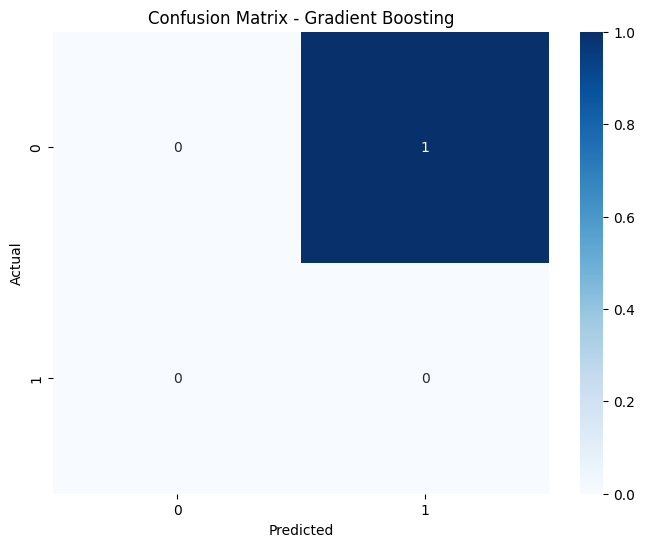

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_train_dataset.csv')

# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Handle missing values
df = df.dropna()

# Convert string to float for numeric columns, drop rows with non-convertible values
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

# Encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Assuming the last column is the target variable
target_column = df.columns[-1]
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### **HYPER-PARAMETER TUNING AND ML EVALUATION,FUTURE ENGINEERING**

**1.Apply Smote**

In [ ]:
""" from imblearn.over_sampling import SMOTE

# Oversample the minority class
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train) """



**2. Hyperparameter Tuning**

Adjust the cross-validation strategy to avoid errors caused by small sample sizes:
Use StratifiedKFold with fewer splits.
Perform grid search with a balanced dataset.

In [ ]:
# from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define parameter grid
""" param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Use StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Perform grid search
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv_strategy,
    verbose=1
)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_) """


**Feature Engineering**


**Adding interaction terms and polynomial features to capture non-linear relationships:**

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
""" poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train model with polynomial features
gb_model_poly = GradientBoostingClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth'],
    random_state=42
)
gb_model_poly.fit(X_train_poly, y_train)

# Evaluate model
y_pred_poly = gb_model_poly.predict(X_test_poly)
print("Accuracy with Polynomial Features:", accuracy_score(y_test, y_pred_poly))
print("\nClassification Report:\n", classification_report(y_test, y_pred_poly)) """
